<a href="https://colab.research.google.com/github/nataliachmurak/colourisation/blob/main/cifar_nogan_rgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing cifar 
from matplotlib import pyplot
from keras.datasets import cifar10
from keras import backend as K


#importing keras
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.metrics import AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from keras.callbacks import Callback

#parameters searches
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#colour schemes
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.color import rgb2gray
from skimage.io import imsave, imread
from skimage import io
from skimage.transform import resize


#others
import numpy as np
import os
import random
import tensorflow as tf
import cv2
import math

print('Done!')

Done!


In [ ]:
#def load_rgb_data():
(train_X, _), (test_X, _) = cifar10.load_data()

from PIL import Image

#train data
train_X = train_X / 255.0

X = train_X[:,:,:,2:]
Y = train_X
#Y = Y / 128
print(X.shape)
print(Y.shape)

#test data
test_X = test_X / 255.0
groundTruth = test_X

testX = test_X[:,:,:,2:]
testY = test_X
#testY = testY / 128

print(testX.shape)
print(testY.shape)


(50000, 32, 32, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 1)
(10000, 32, 32, 3)


In [ ]:
def create_model():
  model = Sequential()
  model.add(InputLayer(input_shape=(32, 32, 1)))
  model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
#model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError(), 'accuracy'])
  model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError(), 'accuracy'])
  return model



model = create_model()
print(model.summary())
print('Done!')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 3)         1731      
Total params: 25,027
Trainable params: 25,027
Non-trainable params: 0
_________________________________________________________________
None
Done!


In [ ]:
history = model.fit(X, Y, batch_size=32, epochs=100, validation_data=(testX, testY))

157/157 [==============================] - 11s 73ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - accuracy: 0.5417
Done!
(100, 32, 32, 3)


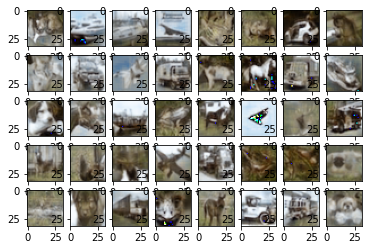

In [ ]:
model.evaluate(testX, testY, batch_size=64, verbose=1)

output = model.predict(testX[:100])
#output *= 128
print('Done!')
print(output.shape)


for i in range(40):
  pyplot.subplot(5, 8, i+1)
  pyplot.imshow((output[i]*255).astype('uint8'))
pyplot.show() 
